In [ ]:
# Colab default version is now 2.x, so uninstall it and install v1.14
%tensorflow_version 2.x
!pip uninstall -y tensorflow tensorboard tensorflow-estimator tensorboard-plugin-wit
!pip install tensorflow-gpu==1.14.0 tensorboard==1.14.0 tensorflow-estimator==1.14.0 

Uninstalling tensorboard-1.14.0:
  Successfully uninstalled tensorboard-1.14.0
Uninstalling tensorflow-estimator-1.14.0:
  Successfully uninstalled tensorflow-estimator-1.14.0
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl


In [ ]:
# Install necessary libraries
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q pillow lxml jupyter matplotlib cython pandas contextlib2
!pip install -q pycocotools tf_slim

In [ ]:
#Repo URL
repo_url = 'https://github.com/ragesh-r/TrafficLightdetection'

## Number of training and evaluation steps (override the setup in .config)
## Do not use these parameters as the lerning rate strategy would be different between models
# num_steps = 10000
# num_eval_steps = 500

# Models
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'model_path': '/models/tf1/train_ssd_mobilenet_v2/',
        'pipeline_file': 'pipeline.config',
        'batch_size': 32
    },
    'faster_rcnn_resnet50_coco': {
        'model_name': 'faster_rcnn_resnet50_coco_2018_01_28',
        'model_path': '/models/tf1/train_faster_rcnn_resnet50_coco/',
        'pipeline_file': 'pipeline.config',
        'batch_size': 16
    },
    'faster_rcnn_resnet101_kitti': {
        'model_name': 'faster_rcnn_resnet101_kitti_2018_01_28',
        'model_path': '/models/tf1/train_faster_rcnn_resnet101_kitti/',
        'pipeline_file': 'pipeline.config',
        'batch_size': 16
    }
}

# Select a model to use.
selected_model = 'ssd_mobilenet_v2'

model_name = MODELS_CONFIG[selected_model]['model_name']
model_path = MODELS_CONFIG[selected_model]['model_path']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']
batch_size = MODELS_CONFIG[selected_model]['batch_size']

In [ ]:
import os
%cd /content

# Set Repository Home Directory
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

# Clone
!git clone {repo_url}

# Pull
%cd {repo_dir_path}
!git pull

/content
fatal: destination path 'TrafficLightdetection' already exists and is not an empty directory.
/content/TrafficLightdetection
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/ragesh-r/TrafficLightdetection
   a8ba2bd..0f160a4  main       -> origin/main
Updating a8ba2bd..0f160a4
Fast-forward
 scripts/generate_tfrecord_v1.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
ls

annotations/  models/    scripts/
data_sim/     README.md  TrafficLight_v0_30122020.ipynb


In [ ]:
# Set Label Map (.pbtxt) path and pipeline.config path
label_map_pbtxt_fname = repo_dir_path + '/annotations/label_map.pbtxt'
pipeline_fname = repo_dir_path + model_path + pipeline_file

assert os.path.isfile(label_map_pbtxt_fname), '`{}` not exist'.format(label_map_pbtxt_fname)
assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [ ]:
# Check pipeline config - update if required
!cat {pipeline_fname}

model {
  ssd {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.99999989895e-05
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.0299999993294
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.999700009823
          center: true
          scale: true
          epsilon: 0.0010000000475
          train: true
        }
      }
      use_depthwise: true
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 

In [ ]:
%cd /content
!git clone --quiet -b r1.13.0 https://github.com/tensorflow/models.git

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!pip install .

# Test
!python object_detection/builders/model_builder_test.py

/content
fatal: destination path 'models' already exists and is not an empty directory.
/content/models/research
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=801477 sha256=2675582bdb67fb4a64f4ae0587d2ab21b74c1caae56cc3722f955e1df3268064
  Stored in directory: /tmp/pip-ephem-wheel-cache-lgsm83tz/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: Fu

In [ ]:
%cd /content
!git clone --quiet https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools /content/models/research/

/content
fatal: destination path 'cocoapi' already exists and is not an empty directory.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:4

In [ ]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = model_name + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)


tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(model_name, DEST_DIR)

/content/models/research


In [ ]:

# Check downloaded files
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 71 root   root  4.0K Jan  3 06:38 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [ ]:
# Set fine tune checkpoint
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

In [ ]:

%cd {repo_dir_path}

# Split images to train:test = 9:1
!python scripts/partition_dataset.py -x -i data_sim/ -r 0.1

# Check test images
!ls data_sim/test

/content/TrafficLightdetection
sim_g_0009.jpg	sim_g_0091.jpg	sim_r_0094.jpg	sim_u_0010.jpg	sim_y_0010.jpg
sim_g_0009.xml	sim_g_0091.xml	sim_r_0094.xml	sim_u_0010.xml	sim_y_0010.xml
sim_g_0013.jpg	sim_g_0097.jpg	sim_r_0096.jpg	sim_u_0017.jpg	sim_y_0015.jpg
sim_g_0013.xml	sim_g_0097.xml	sim_r_0096.xml	sim_u_0017.xml	sim_y_0015.xml
sim_g_0015.jpg	sim_g_0098.jpg	sim_r_0097.jpg	sim_u_0020.jpg	sim_y_0017.jpg
sim_g_0015.xml	sim_g_0098.xml	sim_r_0097.xml	sim_u_0020.xml	sim_y_0017.xml
sim_g_0021.jpg	sim_g_0104.jpg	sim_r_0101.jpg	sim_u_0021.jpg	sim_y_0018.jpg
sim_g_0021.xml	sim_g_0104.xml	sim_r_0101.xml	sim_u_0021.xml	sim_y_0018.xml
sim_g_0022.jpg	sim_g_0108.jpg	sim_r_0105.jpg	sim_u_0024.jpg	sim_y_0021.jpg
sim_g_0022.xml	sim_g_0108.xml	sim_r_0105.xml	sim_u_0024.xml	sim_y_0021.xml
sim_g_0023.jpg	sim_g_0113.jpg	sim_r_0111.jpg	sim_u_0025.jpg	sim_y_0023.jpg
sim_g_0023.xml	sim_g_0113.xml	sim_r_0111.xml	sim_u_0025.xml	sim_y_0023.xml
sim_g_0024.jpg	sim_r_0003.jpg	sim_r_0121.jpg	sim_u_0028.jpg	sim_y_002

In [ ]:
# Create train data:
!python scripts/xml_to_csv.py -i data_sim/train -o annotations/train_labels.csv

# Create test data:
!python scripts/xml_to_csv.py -i data_sim/test -o annotations/test_labels.csv

Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
!cat annotations/label_map.pbtxt

item {
    id: 1
    name: 'Green'
}

item {
    id: 2
    name: 'Yellow'
}

item {
    id: 3
    name: 'Red'
}



In [ ]:

# Create train data:
!python scripts/generate_tfrecord_v1.py \
    --csv_input=annotations/train_labels.csv \
    --output_path=annotations/train.record \
    --img_path=data_sim/train \
    --label_map annotations/label_map.pbtxt

# Create test data:
!python scripts/generate_tfrecord_v1.py \
    --csv_input=annotations/test_labels.csv \
    --output_path=annotations/test.record \
    --img_path=data_sim/test \
    --label_map annotations/label_map.pbtxt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
# Set .record path
test_record_fname = repo_dir_path + '/annotations/test.record'
train_record_fname = repo_dir_path + '/annotations/train.record'

assert os.path.isfile(test_record_fname), '`{}` not exist'.format(test_record_fname)
assert os.path.isfile(train_record_fname), '`{}` not exist'.format(train_record_fname)

In [ ]:
model_dir = repo_dir_path + '/training/'
output_dir = repo_dir_path + '/exported-models/'

!rm -rf {model_dir} {output_dir}
os.makedirs(model_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

In [ ]:

# Set log directory for tensorboard to watch
LOG_DIR = model_dir

# Clean up the directory
!rm -rf {LOG_DIR}/*

In [ ]:
# Option A: Use ngrok tunneling
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2021-01-03 06:39:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.21.141.169, 34.196.3.7, 174.129.26.222, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.21.141.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  68.3MB/s    in 0.2s    

2021-01-03 06:39:10 (68.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:

!sleep 2
get_ipython().system_raw(
    'tensorboard --logdir={} &'.format(LOG_DIR)
)

In [ ]:
!sleep 2
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
!sleep 2
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://4aa1a73a2ec2.ngrok.io


In [ ]:
%cd {repo_dir_path}
!git pull

/content/TrafficLightdetection
Already up to date.


In [ ]:

!rm -rf {LOG_DIR}/*

In [ ]:
!ls -lrt {LOG_DIR}

total 0


In [ ]:
%cd {repo_dir_path}
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr

Streaming output truncated to the last 5000 lines.
W0103 10:20:33.793182 140642269190016 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fe8fcb9aeb8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fe8fcb9aeb8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W0103 10:20:33.860645 140642269190016 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fe791023550>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VER

In [ ]:
# Check the generated files
!ls -lrt {model_dir}
# Archive all the output
%cd {repo_dir_path}
!tar zcvf model_dir.tar.gz {model_dir}
# Download the archive - you may need to run this cell twice as it often stuck before starting downloading
#from google.colab import files
#files.download('model_dir.tar.gz')

total 404056
-rw-r--r-- 1 root root 16434274 Jan  3 06:40 graph.pbtxt
drwxr-xr-x 2 root root     4096 Jan  3 06:50 eval_0
-rw-r--r-- 1 root root 65053064 Jan  3 11:40 model.ckpt-45054.data-00000-of-00001
-rw-r--r-- 1 root root    44531 Jan  3 11:40 model.ckpt-45054.index
-rw-r--r-- 1 root root  8400984 Jan  3 11:40 model.ckpt-45054.meta
-rw-r--r-- 1 root root 65053064 Jan  3 11:50 model.ckpt-46515.data-00000-of-00001
-rw-r--r-- 1 root root    44531 Jan  3 11:50 model.ckpt-46515.index
-rw-r--r-- 1 root root  8400984 Jan  3 11:50 model.ckpt-46515.meta
-rw-r--r-- 1 root root 65053064 Jan  3 12:00 model.ckpt-48033.data-00000-of-00001
-rw-r--r-- 1 root root    44531 Jan  3 12:00 model.ckpt-48033.index
-rw-r--r-- 1 root root  8400984 Jan  3 12:00 model.ckpt-48033.meta
-rw-r--r-- 1 root root 65053064 Jan  3 12:10 model.ckpt-49501.data-00000-of-00001
-rw-r--r-- 1 root root    44531 Jan  3 12:10 model.ckpt-49501.index
-rw-r--r-- 1 root root  8400984 Jan  3 12:10 model.ckpt-49501.meta
-rw-r--r--

In [ ]:
%cd {repo_dir_path}
import re
import numpy as np

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_dir} \
    --trained_checkpoint_prefix={last_model_path}

/content/TrafficLightdetection
/content/TrafficLightdetection/training/model.ckpt-50000
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-

In [ ]:

# Check the output files
!echo {output_dir}
!ls -lsr {output_dir}

/content/TrafficLightdetection/exported-models/
total 33928
    4 drwxr-xr-x 3 root root     4096 Jan  3 12:28 saved_model
    4 -rw-r--r-- 1 root root     4071 Jan  3 12:28 pipeline.config
 1360 -rw-r--r-- 1 root root  1390129 Jan  3 12:28 model.ckpt.meta
   16 -rw-r--r-- 1 root root    15041 Jan  3 12:28 model.ckpt.index
15996 -rw-r--r-- 1 root root 16379432 Jan  3 12:28 model.ckpt.data-00000-of-00001
16544 -rw-r--r-- 1 root root 16938651 Jan  3 12:28 frozen_inference_graph.pb
    4 -rw-r--r-- 1 root root       77 Jan  3 12:28 checkpoint


In [ ]:
%cd {repo_dir_path}
!tar zcvf trained_model.tar.gz {output_dir}


/content/TrafficLightdetection
tar: Removing leading `/' from member names
/content/TrafficLightdetection/exported-models/
/content/TrafficLightdetection/exported-models/frozen_inference_graph.pb
/content/TrafficLightdetection/exported-models/model.ckpt.data-00000-of-00001
/content/TrafficLightdetection/exported-models/model.ckpt.index
/content/TrafficLightdetection/exported-models/saved_model/
/content/TrafficLightdetection/exported-models/saved_model/saved_model.pb
/content/TrafficLightdetection/exported-models/saved_model/variables/
/content/TrafficLightdetection/exported-models/pipeline.config
/content/TrafficLightdetection/exported-models/model.ckpt.meta
/content/TrafficLightdetection/exported-models/checkpoint


In [ ]:
print(output_dir)

/content/TrafficLightdetection/exported-models/


In [ ]:

IMAGE_DIR = os.path.join(repo_dir_path, "data_sim", "test")
IMAGE_PATHS = []

for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_PATHS

['/content/TrafficLightdetection/data_sim/test/sim_y_0061.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_g_0013.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_y_0053.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_g_0024.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_y_0059.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_y_0032.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_r_0181.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_u_0091.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_u_0062.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_g_0091.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_r_0085.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_y_0007.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_r_0051.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_r_0126.jpg',
 '/content/TrafficLightdetection/data_sim/test/sim_r_0044.jpg',
 '/content/TrafficLightdetection/data_si

In [ ]:
# Label Map path
PATH_TO_LABELS = label_map_pbtxt_fname

In [ ]:
PATH_TO_CKPT = os.path.join(os.path.abspath(output_dir), "frozen_inference_graph.pb")

In [ ]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

num_classes = 3

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict





/content/models/research/object_detection


In [ ]:
print(image_path) 

/content/TrafficLightdetection/data_sim/test/sim_u_0075.jpg


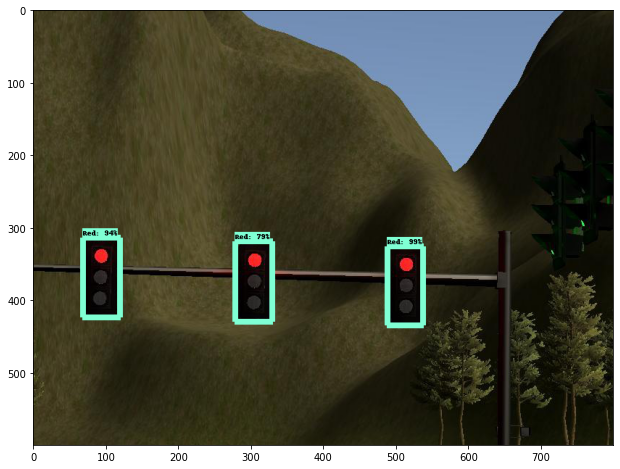

In [ ]:
image = Image.open("/content/TrafficLightdetection/data_sim/test/sim_r_0054.jpg")
# the array based representation of the image will be used later in order to prepare the
# result image with boxes and labels on it.
image_np = load_image_into_numpy_array(image)
# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)
# Actual detection.
output_dict = run_inference_for_single_image(image_np, detection_graph)
# Visualization of the results of a detection.
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=8)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)

In [ ]:

%cd {repo_dir_path}
!tar zcvf trained_model.tar.gz {output_dir}
# Download the .tar.gz archive - you may need to run this cell twice as it often stuck before starting downloading
from google.colab import files
files.download('trained_model.tar.gz')

/content/TrafficLightdetection
tar: Removing leading `/' from member names
/content/TrafficLightdetection/exported-models/
/content/TrafficLightdetection/exported-models/frozen_inference_graph.pb
/content/TrafficLightdetection/exported-models/model.ckpt.data-00000-of-00001
/content/TrafficLightdetection/exported-models/model.ckpt.index
/content/TrafficLightdetection/exported-models/saved_model/
/content/TrafficLightdetection/exported-models/saved_model/saved_model.pb
/content/TrafficLightdetection/exported-models/saved_model/variables/
/content/TrafficLightdetection/exported-models/pipeline.config
/content/TrafficLightdetection/exported-models/model.ckpt.meta
/content/TrafficLightdetection/exported-models/checkpoint


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>